In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'    

flight = pd.read_csv(url1, sep=',')
weather = pd.read_csv(url2, sep=',')

In [3]:
flight.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [4]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


№1 Зависимость задержек от ветра

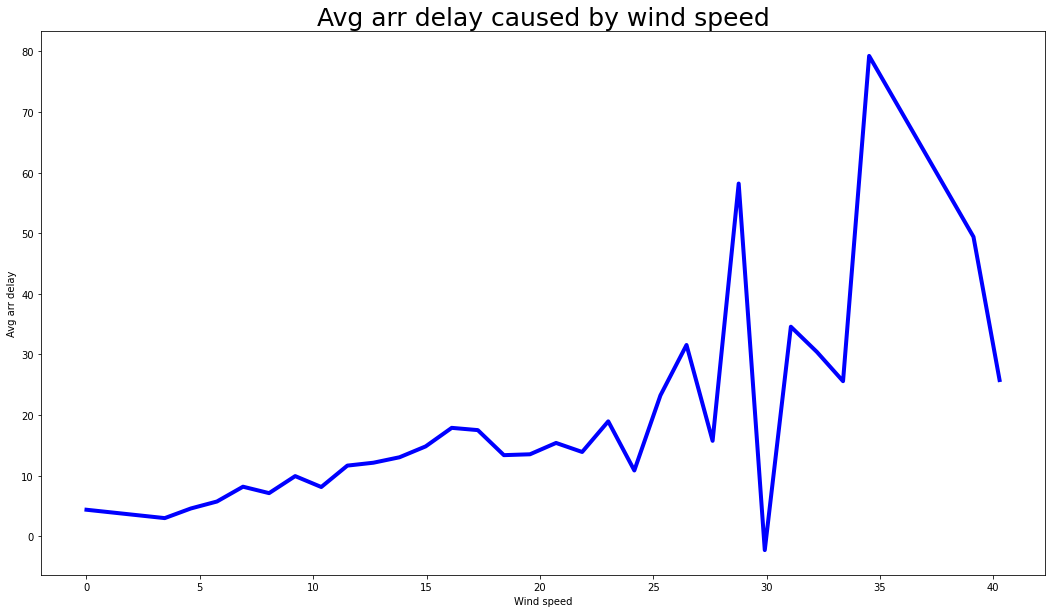

In [5]:
flight_weather = flight.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.figure(figsize=(18,10))
wind_speed_del = pd.DataFrame(flight_weather.groupby('wind_speed')['arr_delay'].mean())
wind_speed_del.sort_index()
wind_speed_del = wind_speed_del.drop(labels=[wind_speed_del.index[-1]])
plt.plot(wind_speed_del.index, wind_speed_del, c= 'b', linewidth=4)
plt.xlabel('Wind speed')
plt.ylabel('Avg arr delay')
plt.title('Avg arr delay caused by wind speed', size =25)
plt.show()

при увеличением скорости ветра, время задержки в среднем увеличивается

№2 Задержки в зависимости от аэропорта по месяцам

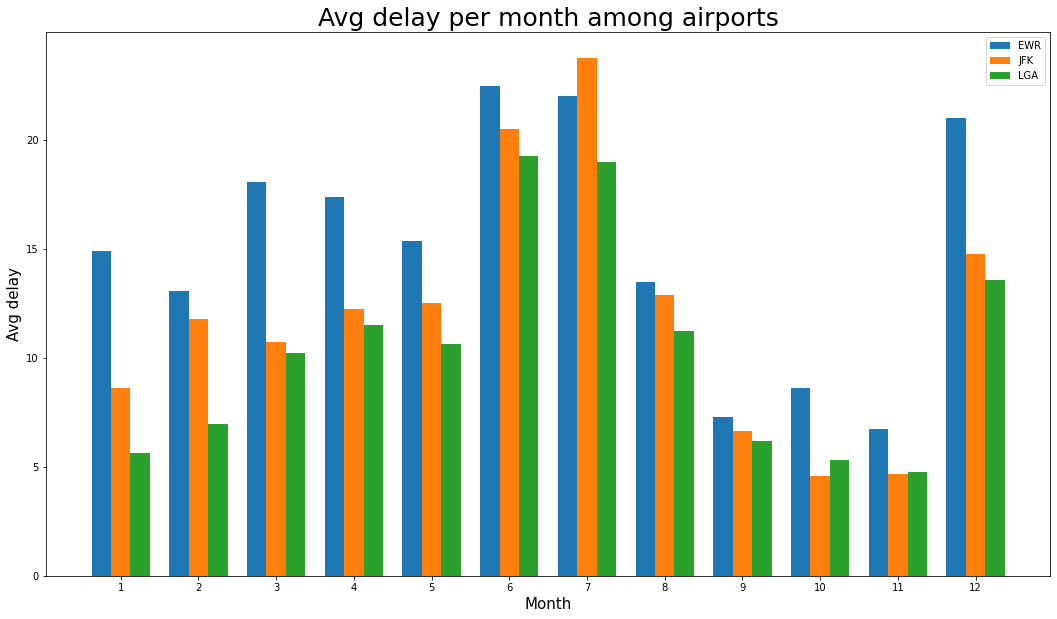

In [6]:
EWR = flight[flight.origin == 'EWR'].groupby('month')['dep_delay'].mean()
JFK = flight[flight.origin == 'JFK'].groupby('month')['dep_delay'].mean()
LGA = flight[flight.origin == 'LGA'].groupby('month')['dep_delay'].mean()
plt.figure(figsize=(18,10))
width = 0.25
plt.bar(EWR.index, EWR, width, label='EWR')
plt.bar(JFK.index + width, JFK, width, label='JFK')
plt.bar(LGA.index + 2*width, LGA, width, label='LGA')
plt.xticks(EWR.index + width, EWR.index)
plt.xlabel('Month', size=15)
plt.ylabel('Avg delay', size=15)
plt.title('Avg delay per month among airports', size=25)
plt.legend(loc='upper right')
plt.show()

перенесение нагрузки с EWR на LGA уменьшит среднюю задержку

№3 Зависимость задержки от влажности

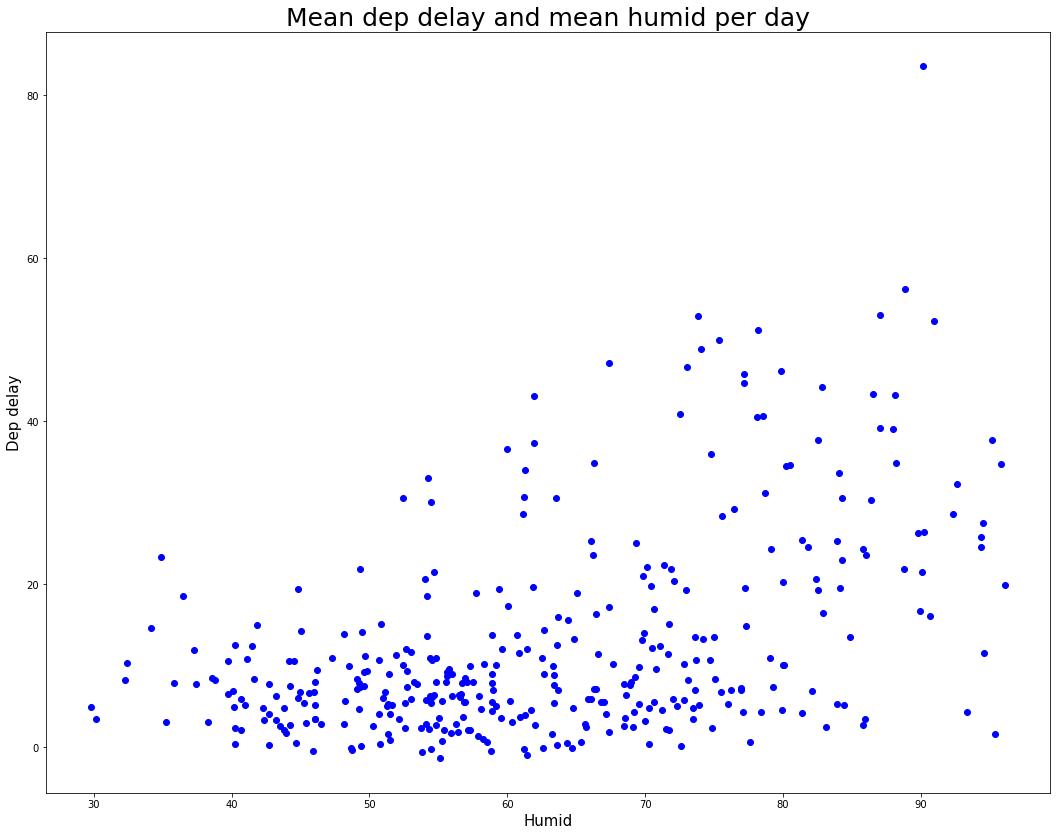

In [7]:
plt.figure(figsize=(18,14))
humid = flight_weather.groupby(['month', 'day'])['humid'].mean()
rand = np.random.choice(336776, 365)
delay = flight.groupby(['month', 'day'])['dep_delay'].mean()
delay_correct = delay.drop(labels = [delay.index[-1]])
plt.scatter(humid, delay_correct, c='blue')
plt.xlabel('Humid', size=15)
plt.ylabel("Dep delay", size=15)
plt.title('Mean dep delay and mean humid per day', size=25)
plt.show()

чем больше влажность, тем больше получается задержка

№4 Зависимость задержки от температуры

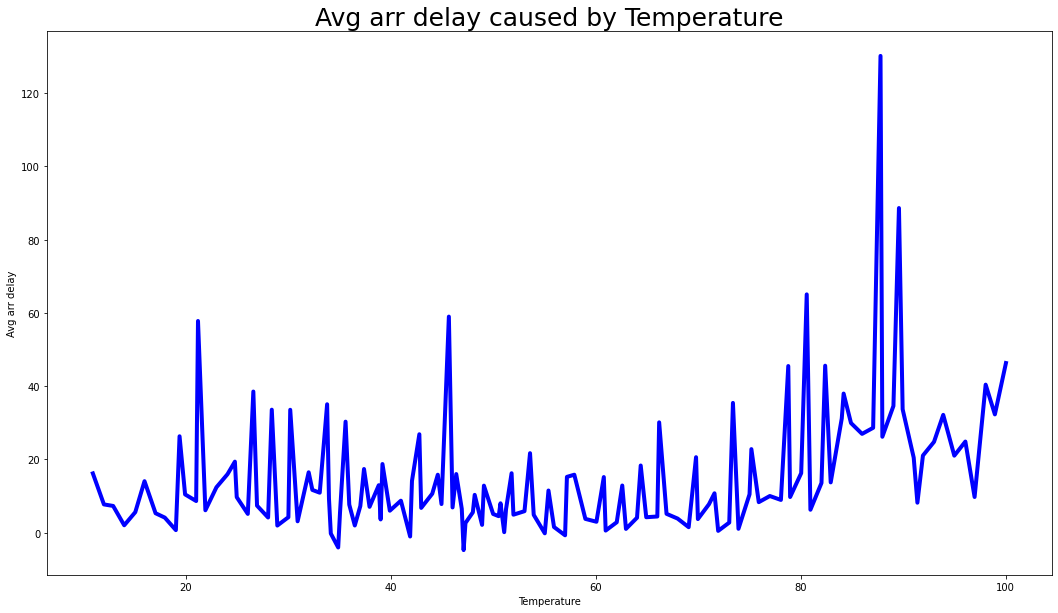

In [8]:
flight_weather = flight.merge(weather, on=['year', 'month', 'day', 'hour', 'origin'], how='inner' )
plt.figure(figsize=(18,10))
temp_del = pd.DataFrame(flight_weather.groupby('temp')['arr_delay'].mean())
temp_del.sort_index()
temp =temp_del.drop(labels=[temp_del.index[-1]])
plt.plot(temp_del.index, temp_del, c= 'b', linewidth=4)
plt.xlabel('Temperature')
plt.ylabel('Avg arr delay')
plt.title('Avg arr delay caused by Temperature', size =25)
plt.show()

начиная с 80 градусов, рост температуры увеличивает време задержки

№5 среднее время задержки в зависимости от компании

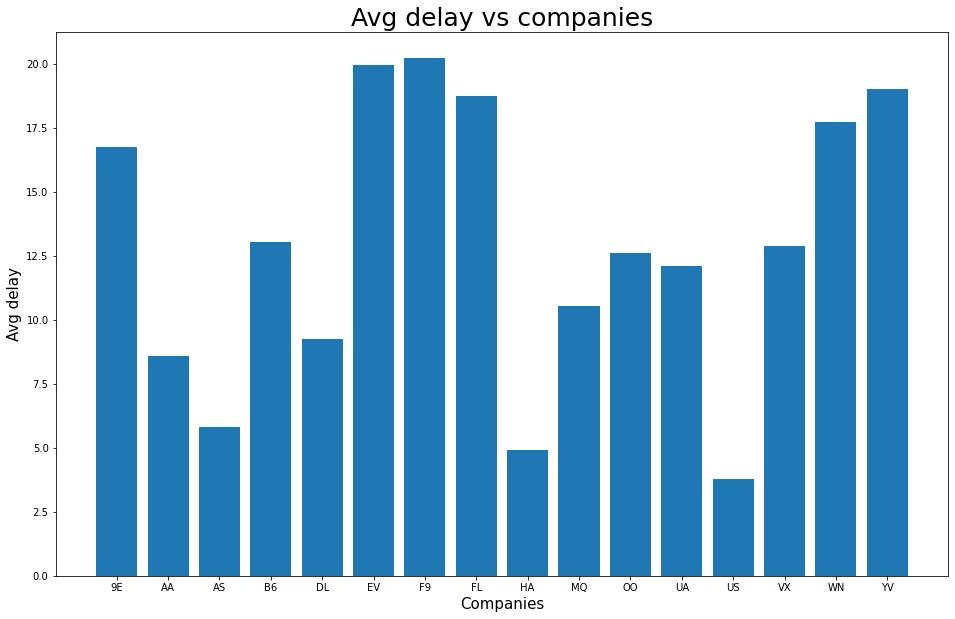

In [9]:
companies_del = flight.groupby(['carrier'])['dep_delay'].mean()
plt.figure(figsize=(16,10))
plt.bar(companies_del.index, companies_del)
plt.xlabel('Companies',size=15)
plt.ylabel('Avg delay', size=15)
plt.title('Avg delay vs companies', size=25)
plt.show()

В среднем компаниии является AS, HA и US более ответственны

№6 Изучим зависимость задержки от времени суток

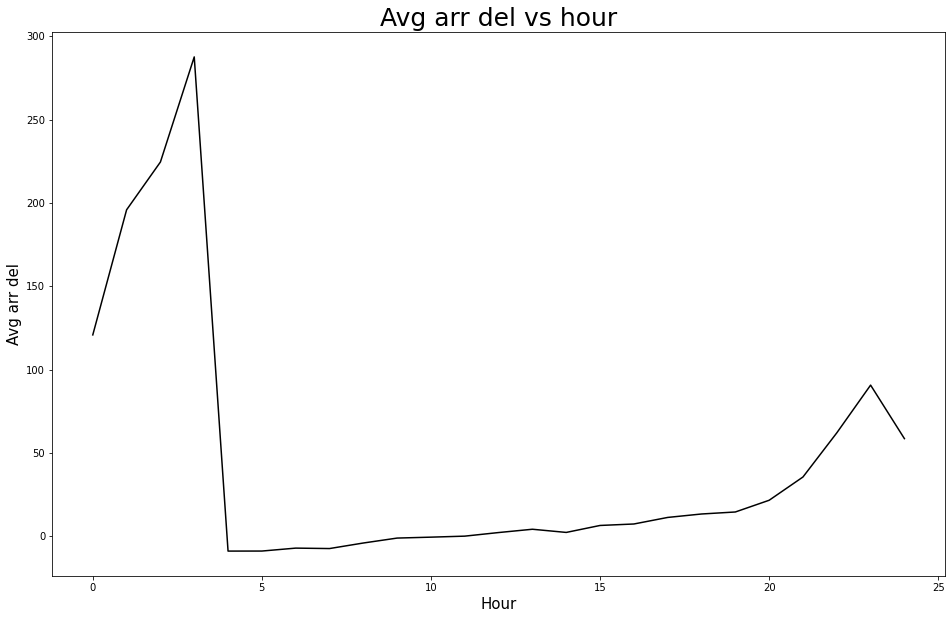

In [11]:
arr_del = flight.dropna(subset=['arr_delay'])
arr_del['arr_delay'].abs()
arr_del = arr_del.groupby('hour')['arr_delay'].mean()
plt.figure(figsize=(16,10))
plt.plot(arr_del.index, arr_del, c='black')
plt.xlabel('Hour', size=15)
plt.ylabel('Avg arr del', size=15)
plt.title('Avg arr del vs hour', size=25)
plt.show()

большие задержки вечером и особенно ночью, следует больше полетов планировать на день